In [1]:
#读入数据
import pandas as pd
import numpy as np
data = pd.read_excel(r"326312325_按序号_决策与价值判断调查_150_106.xlsx")

In [2]:
# 筛选注意力题回答异常的样本并且只保留分析需要的列
data = data[data["10、G．	这题请选1"] == 1]
data = data[data["2、您的年龄段："] != 10]

In [3]:
print(data)

      序号              提交答卷时间  所用时间    来源  来源详情                     来自IP   总分  \
0      2   2025/8/12 2:18:57  176秒  手机提交  直接访问   115.216.234.125(浙江-台州)  214   
1      3   2025/8/12 7:13:14  297秒  手机提交  直接访问   183.238.129.122(广东-东莞)  397   
2      4   2025/8/12 7:48:22  273秒  手机提交  直接访问    223.104.159.64(浙江-绍兴)  334   
3      5  2025/8/12 10:10:30  218秒  手机提交  直接访问    112.224.141.97(山东-济南)  477   
4      6  2025/8/12 10:12:22  167秒  手机提交  直接访问   223.104.101.121(河北-唐山)  571   
..   ...                 ...   ...   ...   ...                      ...  ...   
101  146  2025/8/15 13:23:08  137秒    微信   NaN    223.79.206.171(山东-潍坊)  522   
102  147  2025/8/15 13:29:25  198秒    微信   NaN     60.15.187.53(黑龙江-绥化)  437   
103  148  2025/8/15 13:37:41  153秒    微信   NaN      111.34.3.240(山东-德州)  429   
104  149  2025/8/15 13:43:52  195秒    微信   NaN  111.43.202.182(黑龙江-哈尔滨)  505   
105  150  2025/8/15 13:50:31  182秒    微信   NaN    112.10.221.250(浙江-杭州)  496   

     1、您的性别：  2、您的年龄段：  3、你能在多大水平上承担选择可

In [4]:
#定义cronbach计算方法
def cronbach_alpha(df):
    item_scores = df.dropna(axis=0)
    item_vars = item_scores.var(axis=0, ddof=1)
    total_score = item_scores.sum(axis=1)
    total_var = total_score.var(ddof=1)
    k = df.shape[1]

    alpha = (k / (k - 1)) * (1 - (item_vars.sum() / total_var))
    print("Cronbach =", alpha)
    return alpha

In [5]:
#重新编码并计算公平价值Fv

#提前定义反向计分
reverse_mapping = {1: 6, 2: 5, 3: 4, 4: 3, 5: 2, 6: 1}

F_1 = data["9、在你选择的案例中，你对以下说法有多认可，1代表完全不同意，6代表完全同意—A．	相关人的行为损害了社会公正"]
F_2 = data["9、B．	有些人没有得到他们应得的"]
F_3 = data["9、C．	不公正战胜了公正"]
F_4 = data["9、D．	遭受了不公正的人没有得到补偿"]
F_5 = data["9、E．	案例中的不公正是偶然的，而不是必然"]
F_6 = data["9、F．	相关人员做决定时没有力求公正"]

df_fairness = pd.concat([F_1, F_2, F_3, F_4, F_5, F_6], axis=1)

cronbach = cronbach_alpha(df_fairness)

Cronbach = 0.8272844120732189


In [6]:
#因子分析数据预处理：
#1.传入数据（已经完成）
#2.删除缺失并转化为数值
def preprocess(df):
    df = df.dropna()
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

# KMO 和 Bartlett 检验
def kmo_bartlett(df):
    from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
    kmo_all, kmo_model = calculate_kmo(df)
    print("KMO 值:", kmo_model)
    chi_square_value, p_value = calculate_bartlett_sphericity(df)
    print("Bartlett 检验 χ²:", chi_square_value, "p值:", p_value)

df_clean = preprocess(df_fairness)
kmo_bartlett(df_clean)


KMO 值: 0.8539225992195884
Bartlett 检验 χ²: 242.19711750837507 p值: 5.007067679095044e-43


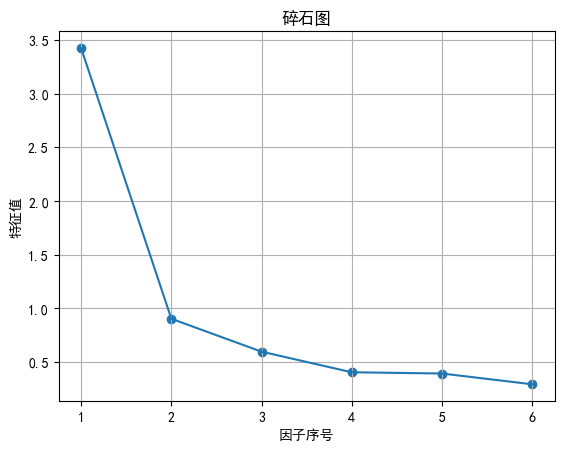


方差贡献情况：
   因子序号    特征值  方差贡献率(%)  累计贡献率(%)
0     1  3.426    57.103    57.103
1     2  0.901    15.012    72.115
2     3  0.594     9.892    82.007
3     4  0.401     6.685    88.692
4     5  0.389     6.491    95.183
5     6  0.289     4.817   100.000


In [7]:
#4.确定因子数量：
def factor_number(df):
    from factor_analyzer import FactorAnalyzer
    import matplotlib.pyplot as plt
    from matplotlib import rcParams
    import pandas as pd

    fa = FactorAnalyzer(rotation=None)
    fa.fit(df)

    # 获取特征值
    ev, v = fa.get_eigenvalues()

    # 显示碎石图
    plt.scatter(range(1, df.shape[1]+1), ev)
    plt.plot(range(1, df.shape[1]+1), ev)
    rcParams['font.sans-serif'] = ['SimHei']  # 中文字体
    rcParams['axes.unicode_minus'] = False
    plt.xlabel('因子序号')
    plt.ylabel('特征值')
    plt.title('碎石图')
    plt.grid(True)
    plt.show()

    # 方差贡献情况
    variance_df = pd.DataFrame({
        "因子序号": range(1, len(ev) + 1),
        "特征值": ev,
        "方差贡献率(%)": ev / sum(ev) * 100,
        "累计贡献率(%)": (ev / sum(ev) * 100).cumsum()
    })
    print("\n方差贡献情况：")
    print(variance_df.round(3))

factor_number(df_clean)

因子载荷矩阵：
                                                      因子1    因子2
9、在你选择的案例中，你对以下说法有多认可，1代表完全不同意，6代表完全同意—A．\t相关人的...  0.521  0.569
9、B．\t有些人没有得到他们应得的                                  0.335  0.880
9、C．\t不公正战胜了公正                                      0.593  0.522
9、D．\t遭受了不公正的人没有得到补偿                                0.715  0.333
9、E．\t案例中的不公正是偶然的，而不是必然                             0.217  0.225
9、F．\t相关人员做决定时没有力求公正                                0.667  0.298


C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.draw()
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


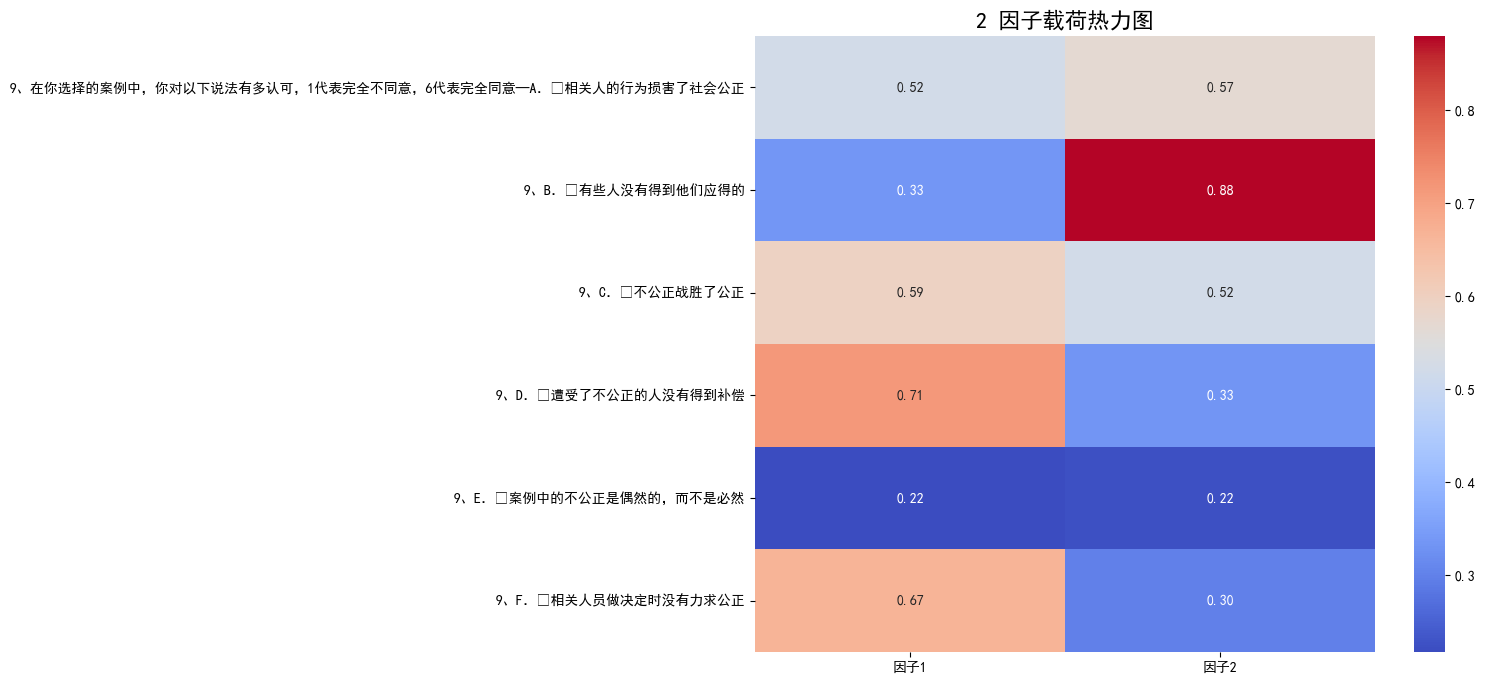

In [8]:
# 5. 提取因子
def extract_factors(df, n_factors, rotation='varimax'):
    from factor_analyzer import FactorAnalyzer
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib import rcParams

    # 提取因子
    fa = FactorAnalyzer(n_factors=n_factors, rotation=rotation)
    fa.fit(df)

    # 因子载荷矩阵
    loadings = pd.DataFrame(fa.loadings_, 
                            index=df.columns, 
                            columns=[f"因子{i+1}" for i in range(n_factors)])
    print("因子载荷矩阵：")
    print(loadings.round(3))

    # 绘制因子载荷热力图
    plt.figure(figsize=(10, 8))
    rcParams['font.sans-serif'] = ['SimHei']  # 中文字体
    rcParams['axes.unicode_minus'] = False
    sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title(f'{n_factors} 因子载荷热力图', fontsize=16)
    plt.show()

extract_factors(df_clean, n_factors=2, rotation='varimax')


因子载荷矩阵：
                                                      因子1    因子2    因子3
9、在你选择的案例中，你对以下说法有多认可，1代表完全不同意，6代表完全同意—A．\t相关人的...  0.620  0.344  0.320
9、B．\t有些人没有得到他们应得的                                  0.807  0.233  0.297
9、C．\t不公正战胜了公正                                      0.564  0.374  0.387
9、D．\t遭受了不公正的人没有得到补偿                                0.316  0.922  0.213
9、E．\t案例中的不公正是偶然的，而不是必然                             0.210  0.029  0.317
9、F．\t相关人员做决定时没有力求公正                                0.234  0.384  0.693


C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.draw()
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


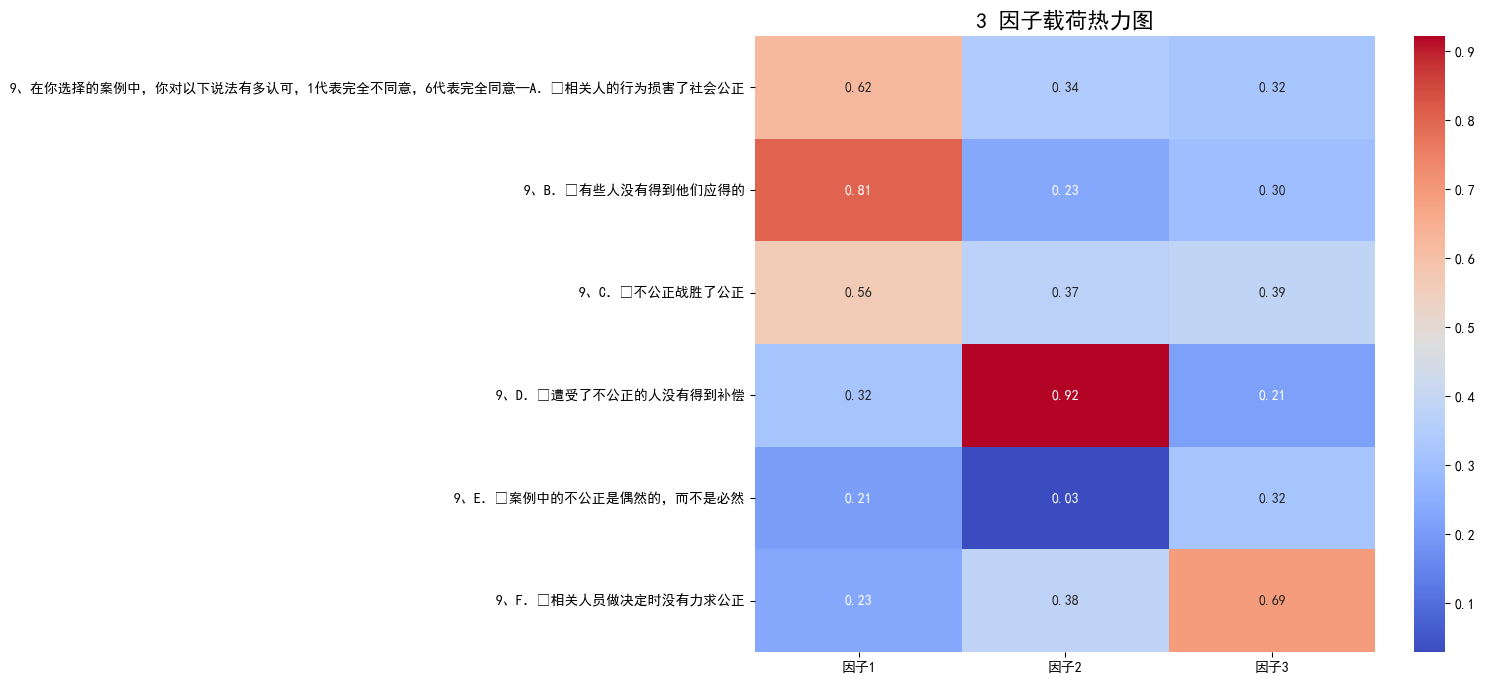

In [9]:
extract_factors(df_clean, n_factors=3, rotation='varimax')

C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(
C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.draw()


因子载荷矩阵：
                                                      因子1
9、在你选择的案例中，你对以下说法有多认可，1代表完全不同意，6代表完全同意—A．\t相关人的... -0.783
9、B．\t有些人没有得到他们应得的                                 -0.788
9、C．\t不公正战胜了公正                                     -0.805
9、D．\t遭受了不公正的人没有得到补偿                               -0.738
9、E．\t案例中的不公正是偶然的，而不是必然                            -0.316
9、F．\t相关人员做决定时没有力求公正                               -0.682


D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


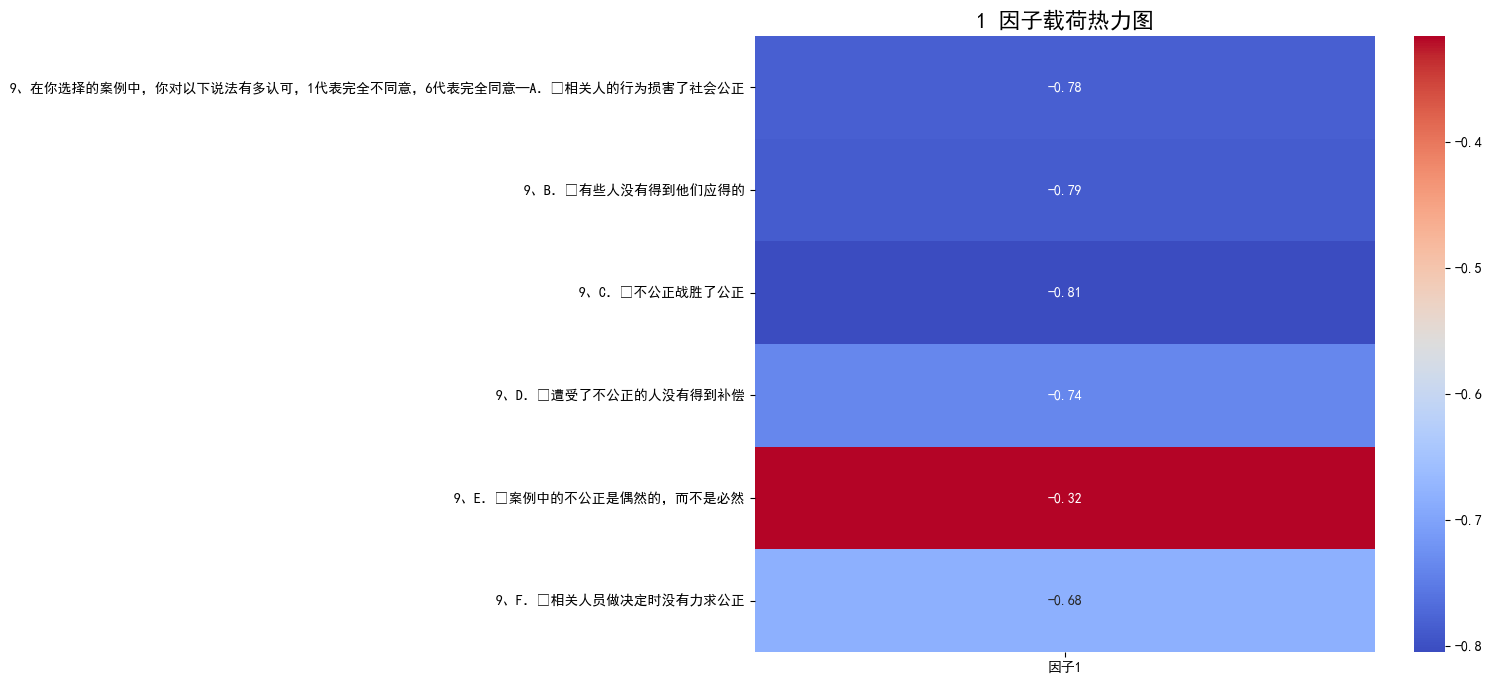

In [10]:
extract_factors(df_clean, n_factors=1, rotation='varimax')

In [11]:
#删除因子负荷不高的E项后重新测试信度
df_fairness_2 = pd.concat([F_1, F_2, F_3, F_4, F_6], axis=1)
cronbach = cronbach_alpha(df_fairness_2)

Cronbach = 0.8718803483101687


KMO 值: 0.851391546380464
Bartlett 检验 χ²: 231.4936018174817 p值: 4.1760445589110483e-44


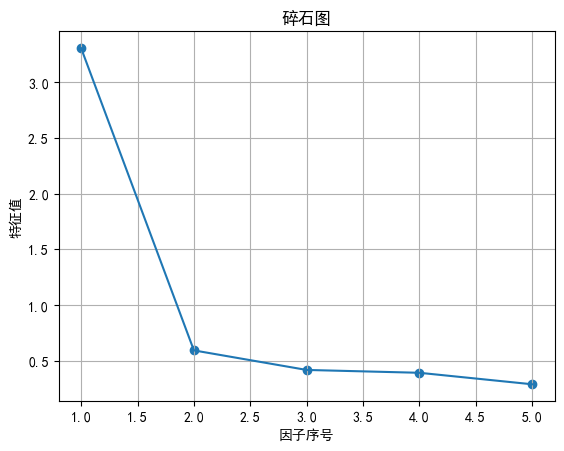


方差贡献情况：
   因子序号    特征值  方差贡献率(%)  累计贡献率(%)
0     1  3.307    66.140    66.140
1     2  0.594    11.870    78.010
2     3  0.418     8.358    86.369
3     4  0.392     7.847    94.215
4     5  0.289     5.785   100.000


In [12]:
df_clean = preprocess(df_fairness_2)
kmo_bartlett(df_clean)
factor_number(df_clean)

因子载荷矩阵：
                                                      因子1
9、在你选择的案例中，你对以下说法有多认可，1代表完全不同意，6代表完全同意—A．\t相关人的... -0.783
9、B．\t有些人没有得到他们应得的                                 -0.784
9、C．\t不公正战胜了公正                                     -0.806
9、D．\t遭受了不公正的人没有得到补偿                               -0.751
9、F．\t相关人员做决定时没有力求公正                               -0.672


C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(
C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.draw()
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


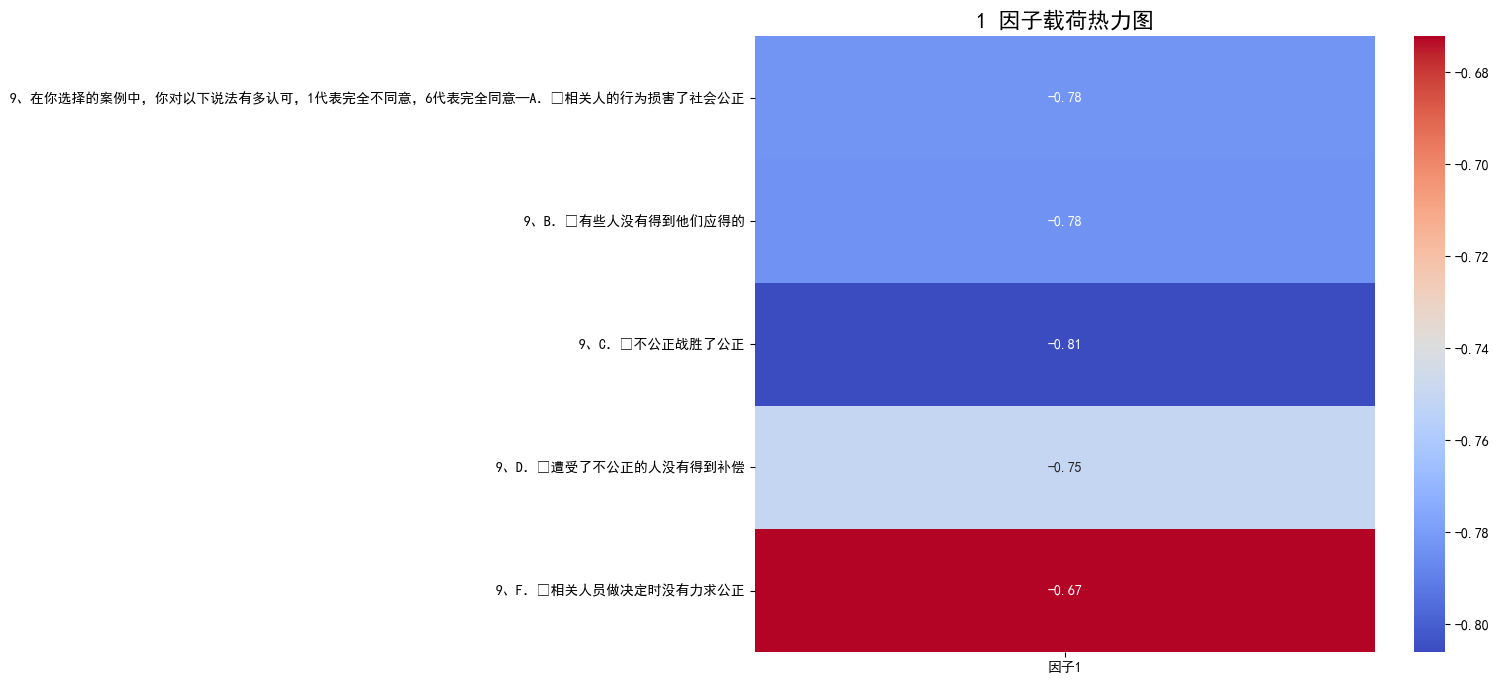

In [13]:
extract_factors(df_clean, n_factors=1, rotation='varimax')

In [14]:
#重新编码并计算忠诚成本Lc

L_1 = data["10、在你选择的案例中，你对以下说法有多认可，1代表完全不同意，6代表完全同意—A．	举报同事或朋友是一种对关系的背叛"]
L_2 = data["10、B．	即使举报是正确的，也会削弱我对团队的忠诚感"]
L_3 = data["10、C．	举报行为会被视为对团队利益的损害"]
L_4 = data["10、D．	考虑到我和朋友、同事的关系，我会犹豫是否继续举报"]
L_5 = data["10、E．	即使有不当行为，我仍会优先维护与团队的关系"]
L_6 = data["10、F．	举报会让我感觉自己不再完全属于这个群体"]

df_loyalty = pd.concat([L_1, L_2, L_3, L_4, L_5, L_6], axis=1)

cronbach = cronbach_alpha(df_loyalty)

Cronbach = 0.8599484808565266


KMO 值: 0.8480780936318085
Bartlett 检验 χ²: 244.268090476742 p值: 1.878052870602832e-43


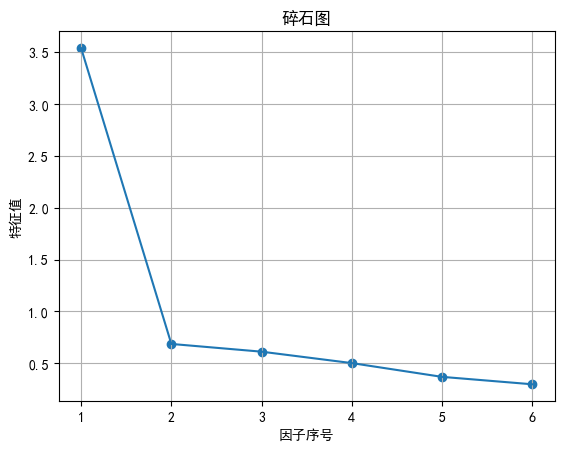


方差贡献情况：
   因子序号    特征值  方差贡献率(%)  累计贡献率(%)
0     1  3.538    58.973    58.973
1     2  0.685    11.425    70.398
2     3  0.611    10.181    80.579
3     4  0.501     8.347    88.926
4     5  0.368     6.133    95.059
5     6  0.296     4.941   100.000


In [15]:
df_clean = preprocess(df_loyalty)
kmo_bartlett(df_clean)
factor_number(df_clean)

因子载荷矩阵：
                                                      因子1
10、在你选择的案例中，你对以下说法有多认可，1代表完全不同意，6代表完全同意—A．\t举报同... -0.814
10、B．\t即使举报是正确的，也会削弱我对团队的忠诚感                       -0.742
10、C．\t举报行为会被视为对团队利益的损害                            -0.728
10、D．\t考虑到我和朋友、同事的关系，我会犹豫是否继续举报                    -0.626
10、E．\t即使有不当行为，我仍会优先维护与团队的关系                       -0.691
10、F．\t举报会让我感觉自己不再完全属于这个群体                         -0.668


C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(
C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.draw()
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


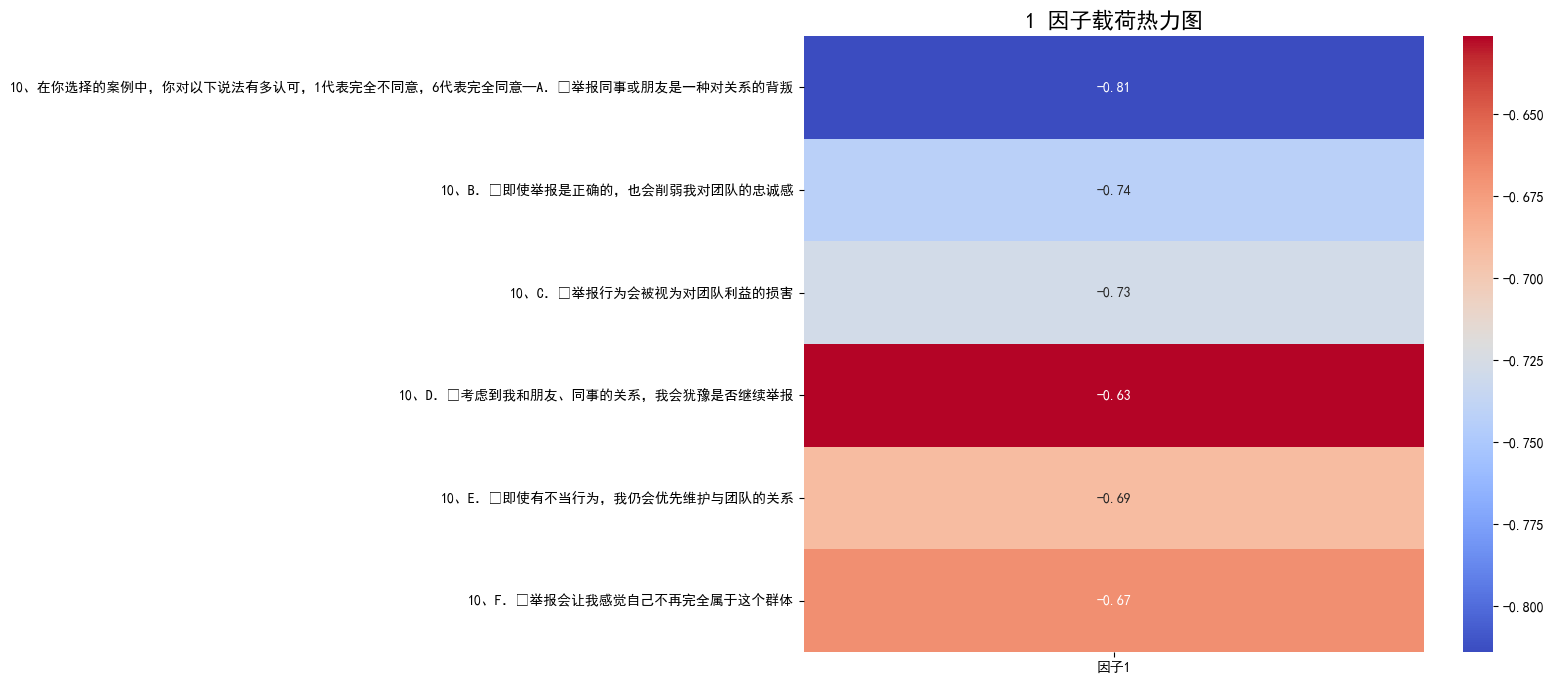

In [16]:
extract_factors(df_clean, n_factors=1, rotation='varimax')

因子载荷矩阵：
                                                      因子1    因子2
10、在你选择的案例中，你对以下说法有多认可，1代表完全不同意，6代表完全同意—A．\t举报同...  0.709  0.364
10、B．\t即使举报是正确的，也会削弱我对团队的忠诚感                        0.704  0.250
10、C．\t举报行为会被视为对团队利益的损害                             0.780  0.137
10、D．\t考虑到我和朋友、同事的关系，我会犹豫是否继续举报                     0.294  0.954
10、E．\t即使有不当行为，我仍会优先维护与团队的关系                        0.639  0.257
10、F．\t举报会让我感觉自己不再完全属于这个群体                          0.563  0.337


C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.draw()
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


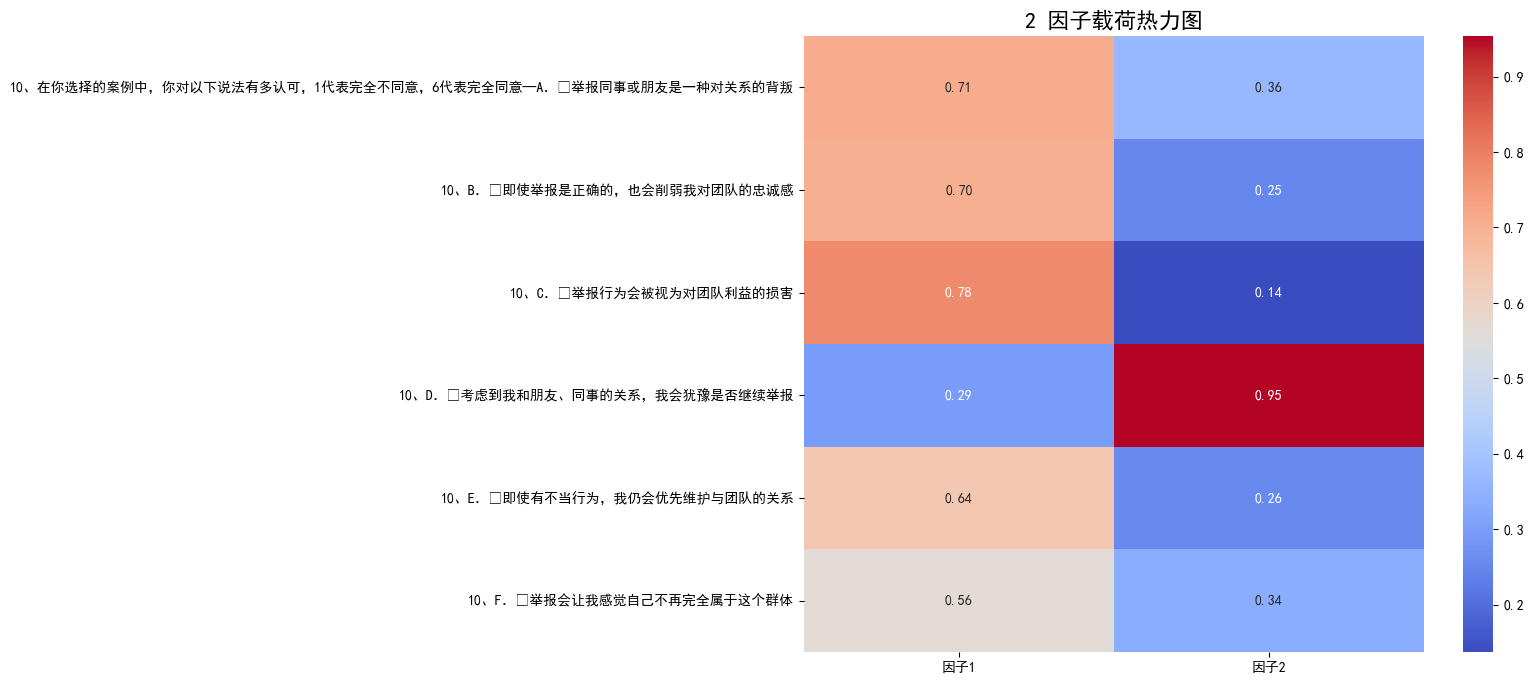

In [17]:
extract_factors(df_clean, n_factors=2, rotation='varimax')

In [18]:
#重新编码并计算感知收益P_p （直接举报的情况）

P_1 = data["11、假设你即将要采取直接举报的行动，那么你对下面的说法认可程度多高，1代表完全不同意，6代表完全同意—A.	这会提高我在组织中的声望"]
P_2 = data["11、B.	这会给我带来职业晋升机会"]
P_3 = data["11、C.	这会使我获得满意的经济等物质奖励"]
P_4 = data["11、D.	这会让我觉得我在做正确的事情"]
P_5 = data["11、E.	这会使我获得心理上的满足或者释怀"]

df_perceived_profit_direct = pd.concat([P_1, P_2, P_3, P_4, P_5], axis=1)

cronbach = cronbach_alpha(df_perceived_profit_direct)


Cronbach = 0.8004268714582252


KMO 值: 0.714302164725387
Bartlett 检验 χ²: 239.2519955665389 p值: 9.836095725824381e-46


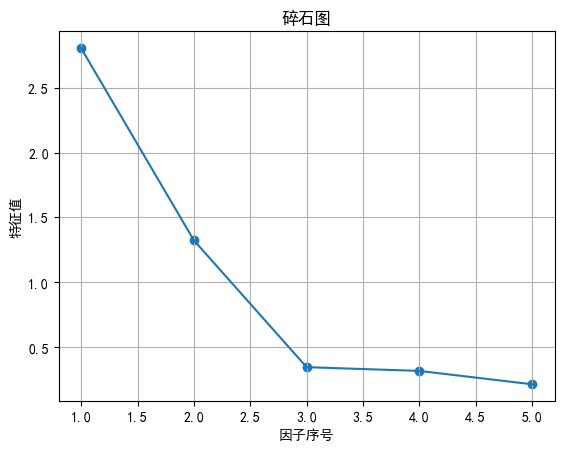


方差贡献情况：
   因子序号    特征值  方差贡献率(%)  累计贡献率(%)
0     1  2.804    56.078    56.078
1     2  1.323    26.452    82.530
2     3  0.345     6.897    89.427
3     4  0.316     6.316    95.743
4     5  0.213     4.257   100.000


In [19]:
df_clean = preprocess(df_perceived_profit_direct)
kmo_bartlett(df_clean)
factor_number(df_clean)

因子载荷矩阵：
                                                      因子1    因子2
11、假设你即将要采取直接举报的行动，那么你对下面的说法认可程度多高，1代表完全不同意，6代表...  0.825  0.213
11、B.\t这会给我带来职业晋升机会                                 0.910  0.091
11、C.\t这会使我获得满意的经济等物质奖励                             0.791  0.143
11、D.\t这会让我觉得我在做正确的事情                               0.090  0.718
11、E.\t这会使我获得心理上的满足或者释怀                             0.231  0.870


C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.draw()
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


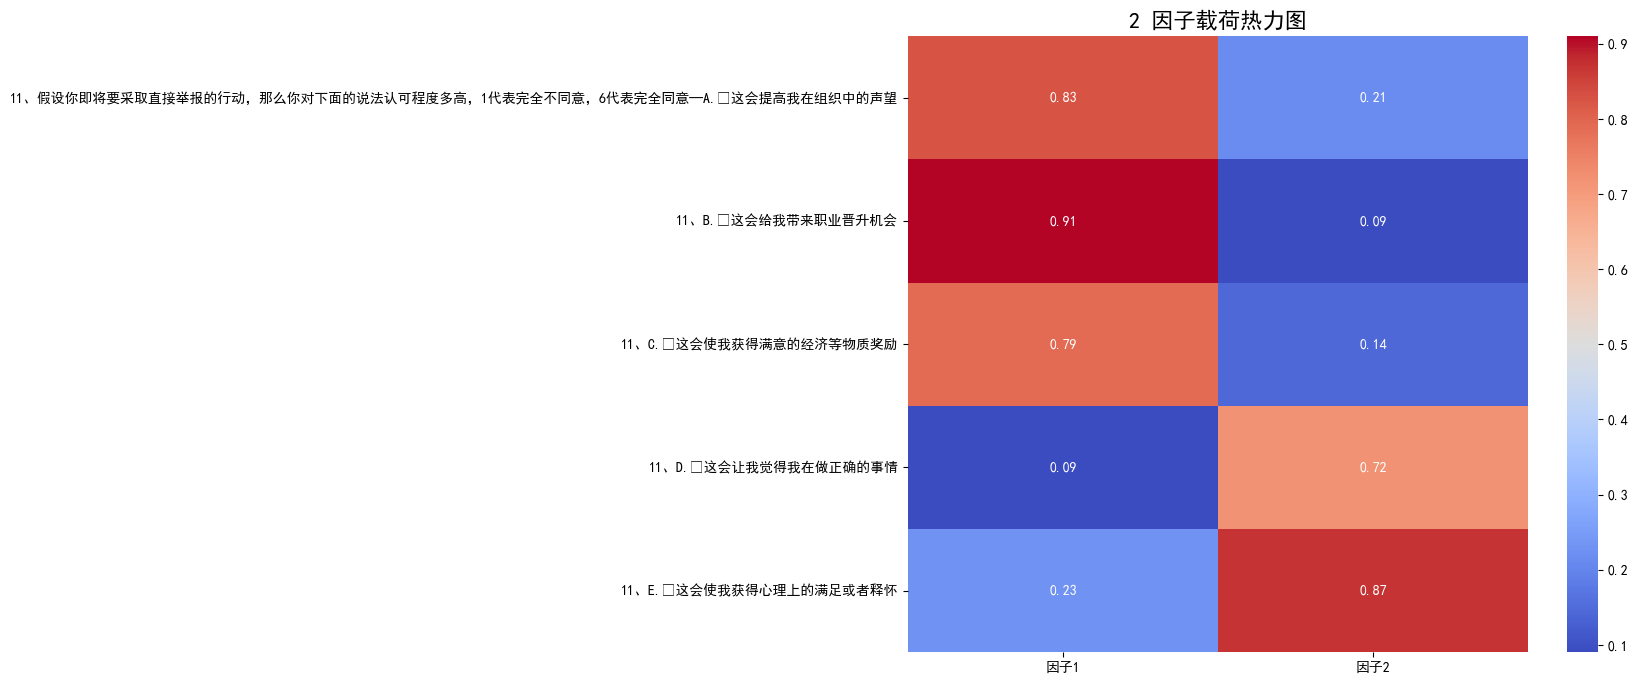

In [20]:
extract_factors(df_clean, n_factors=2, rotation='varimax')

In [21]:
df_perceived_profit_direct_material = pd.concat([P_1, P_2, P_3], axis=1)
df_perceived_profit_direct_psychology = pd.concat([P_4, P_5], axis=1)

cronbach = cronbach_alpha(df_perceived_profit_direct_material)
cronbach = cronbach_alpha(df_perceived_profit_direct_psychology)

Cronbach = 0.8894676144742315
Cronbach = 0.7842500383024358


In [22]:
#重新编码并计算感知收益P_p （匿名举报的情况）

P_1 = data["12、假设你即将要采取匿名举报的行动，那么你对下面的说法认可程度多高，1代表完全不同意，6代表完全同意—A.	这会提高我在组织中的声望"]
P_2 = data["12、B.	这会给我带来职业晋升机会"]
P_3 = data["12、C.	这会使我获得满意的经济等物质奖励"]
P_4 = data["12、D.	这会让我觉得我在做正确的事情"]
P_5 = data["12、E.	这会使我获得心理上的满足或者释怀"]

df_perceived_profit_anonymous = pd.concat([P_1, P_2, P_3, P_4, P_5], axis=1)

cronbach = cronbach_alpha(df_perceived_profit_anonymous)


Cronbach = 0.8023449835805139


KMO 值: 0.698108359817333
Bartlett 检验 χ²: 322.8329568908579 p值: 2.2915156459726737e-63


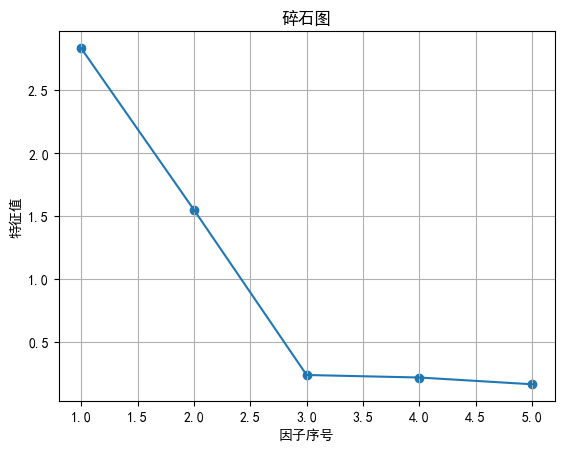


方差贡献情况：
   因子序号    特征值  方差贡献率(%)  累计贡献率(%)
0     1  2.835    56.692    56.692
1     2  1.550    31.010    87.701
2     3  0.236     4.724    92.425
3     4  0.216     4.325    96.750
4     5  0.163     3.250   100.000


In [23]:
df_clean = preprocess(df_perceived_profit_anonymous)
kmo_bartlett(df_clean)
factor_number(df_clean)

因子载荷矩阵：
                                                      因子1    因子2
12、假设你即将要采取匿名举报的行动，那么你对下面的说法认可程度多高，1代表完全不同意，6代表...  0.846  0.143
12、B.\t这会给我带来职业晋升机会                                 0.912  0.074
12、C.\t这会使我获得满意的经济等物质奖励                             0.910  0.101
12、D.\t这会让我觉得我在做正确的事情                               0.026  0.938
12、E.\t这会使我获得心理上的满足或者释怀                             0.210  0.810


C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.draw()
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


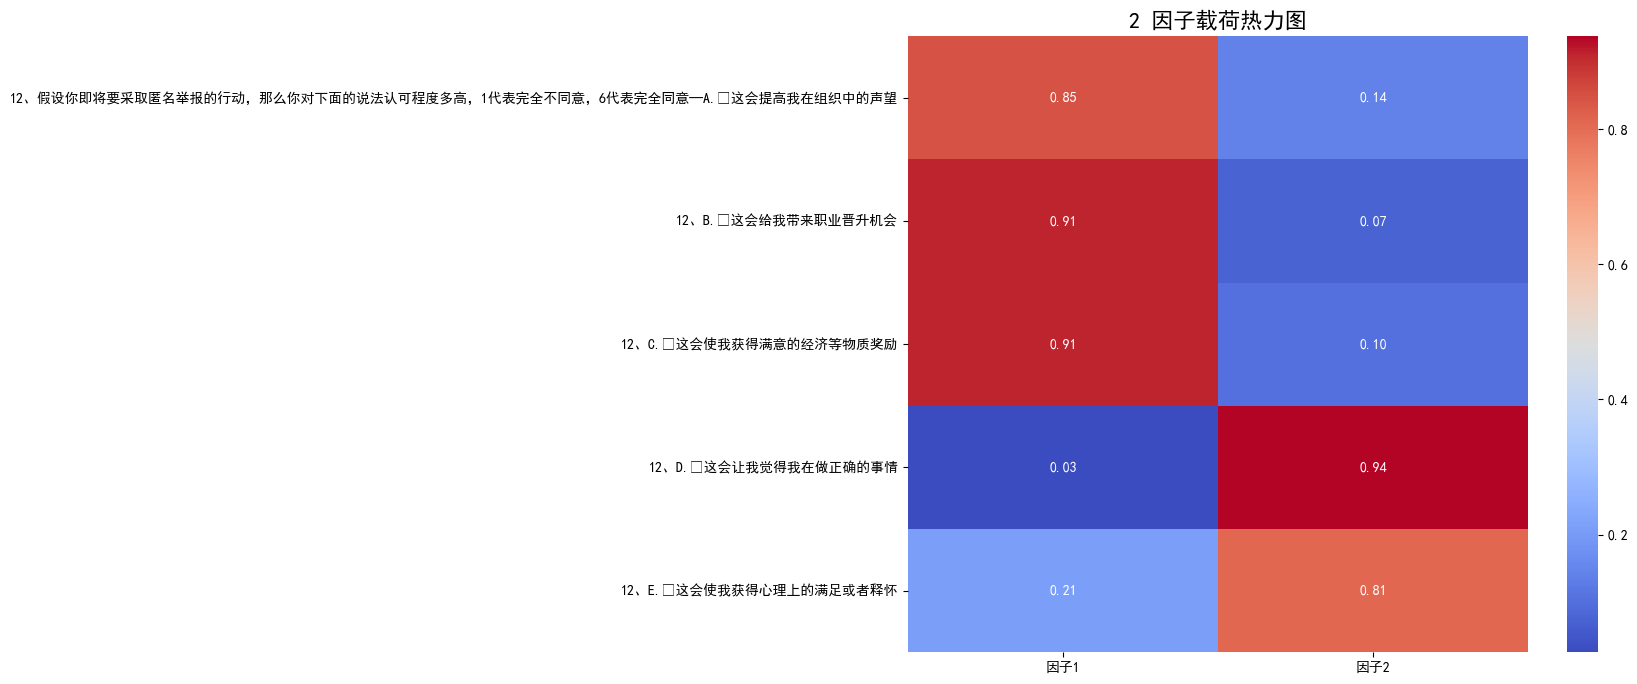

In [24]:
extract_factors(df_clean, n_factors=2, rotation='varimax')

In [25]:
df_perceived_profit_anonymous_material = pd.concat([P_1, P_2, P_3], axis=1)
df_perceived_profit_anonymous_psychology = pd.concat([P_4, P_5], axis=1)

cronbach = cronbach_alpha(df_perceived_profit_anonymous_material)
cronbach = cronbach_alpha(df_perceived_profit_anonymous_psychology)

Cronbach = 0.9235455930161187
Cronbach = 0.8659179687500014


In [26]:
#重新编码并计算感知收益P_p （继续观察的情况）

P_1 = data["13、假设你即将要采取继续保持观察，等待时机或者搜集更多证据后再采取行动的行动，那么你对下面的说法认可程度多高，1代表完全不同意，6代表完全同意—A.	这会提高我在组织中的声望"]
P_2 = data["13、B.	这会给我带来职业晋升机会"]
P_3 = data["13、C.	这会使我获得满意的经济等物质奖励"]
P_4 = data["13、D.	这会让我觉得我在做正确的事情"]
P_5 = data["13、E.	这会使我获得心理上的满足或者释怀"]

df_perceived_profit_delay = pd.concat([P_1, P_2, P_3, P_4, P_5], axis=1)

cronbach = cronbach_alpha(df_perceived_profit_delay)


Cronbach = 0.8462768014837805


KMO 值: 0.7809071088581332
Bartlett 检验 χ²: 278.8662613761015 p值: 4.5160754532369194e-54


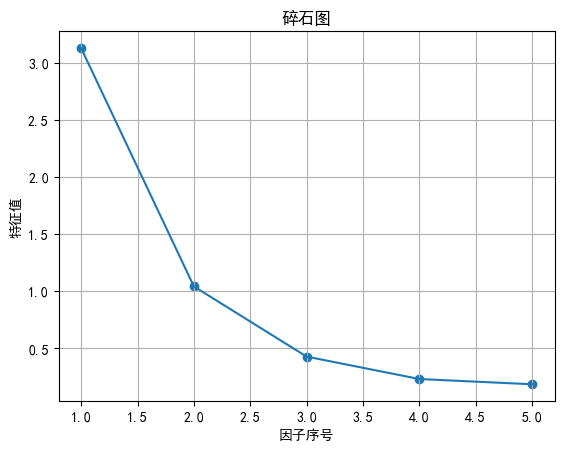


方差贡献情况：
   因子序号    特征值  方差贡献率(%)  累计贡献率(%)
0     1  3.126    62.523    62.523
1     2  1.039    20.784    83.307
2     3  0.425     8.491    91.798
3     4  0.228     4.561    96.359
4     5  0.182     3.641   100.000


In [27]:
df_clean = preprocess(df_perceived_profit_delay)
kmo_bartlett(df_clean)
factor_number(df_clean)

因子载荷矩阵：
                                                      因子1    因子2
13、假设你即将要采取继续保持观察，等待时机或者搜集更多证据后再采取行动的行动，那么你对下面的...  0.812  0.291
13、B.\t这会给我带来职业晋升机会                                 0.868  0.258
13、C.\t这会使我获得满意的经济等物质奖励                             0.896  0.134
13、D.\t这会让我觉得我在做正确的事情                               0.107  0.908
13、E.\t这会使我获得心理上的满足或者释怀                             0.377  0.566


C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.draw()
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


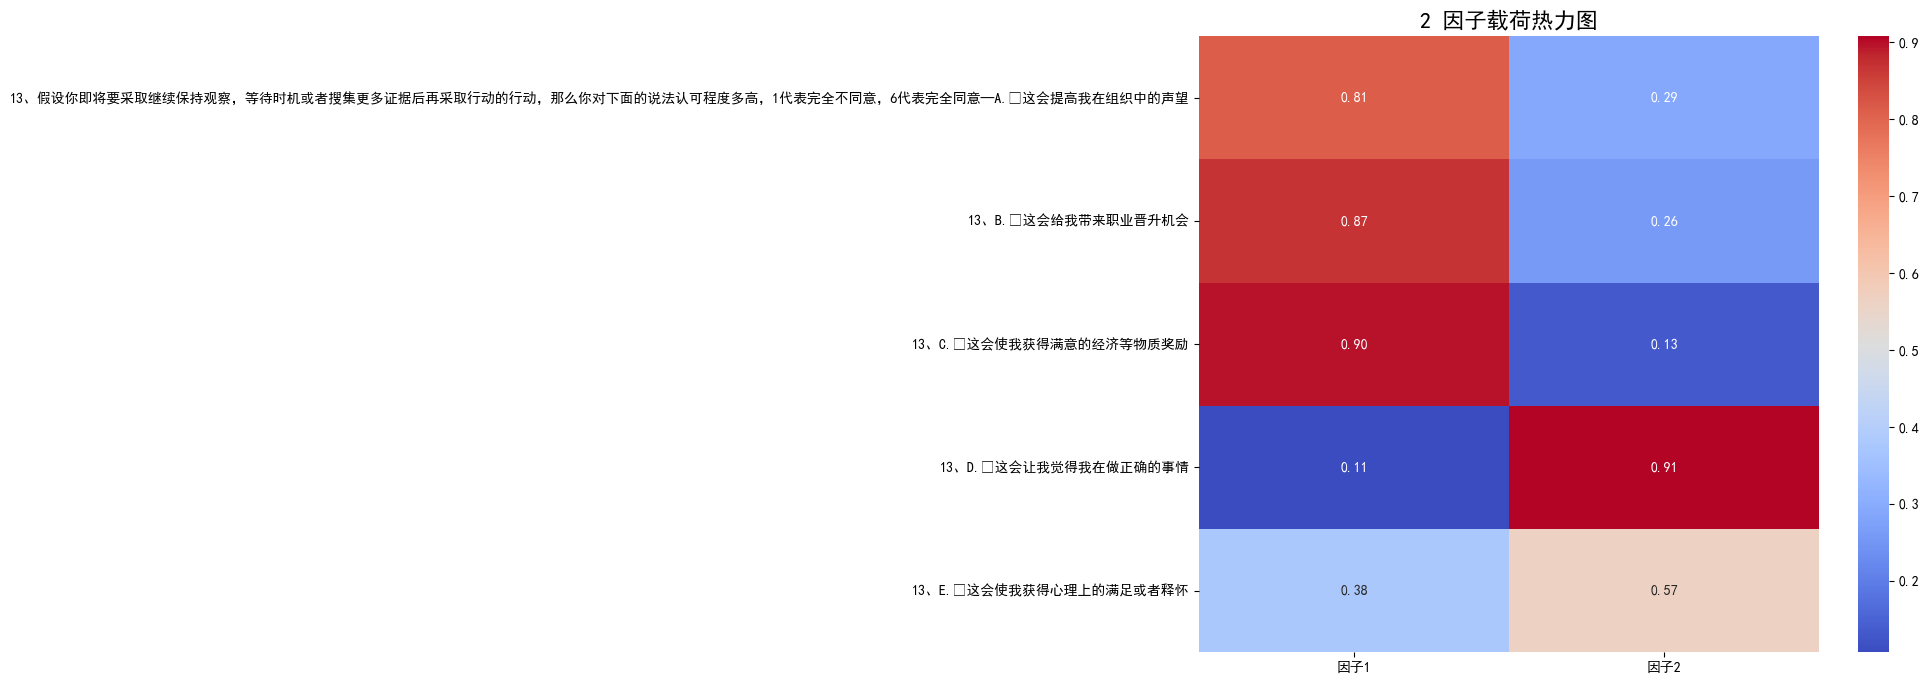

In [28]:
extract_factors(df_clean, n_factors=2, rotation='varimax')

In [29]:
df_perceived_profit_delay_material = pd.concat([P_1, P_2, P_3], axis=1)
df_perceived_profit_delay_psychology = pd.concat([P_4, P_5], axis=1)

cronbach = cronbach_alpha(df_perceived_profit_delay_material)
cronbach = cronbach_alpha(df_perceived_profit_delay_psychology)

Cronbach = 0.916284790892866
Cronbach = 0.7117986010538302


In [30]:
#重新编码并计算感知收益P_p （保持沉默的情况）

P_1 = data["14、假设你即将要采取保持沉默，等待第三方想办法解决问题的行动，那么你对下面的说法认可程度多高，1代表完全不同意，6代表完全同意—A.	这会提高我在组织中的声望"]
P_2 = data["14、B.	这会给我带来职业晋升机会"]
P_3 = data["14、C.	这会使我获得满意的经济等物质奖励"]
P_4 = data["14、D.	这会让我觉得我在做正确的事情"]
P_5 = data["14、E.	这会使我获得心理上的满足或者释怀"]

df_perceived_profit_silence = pd.concat([P_1, P_2, P_3, P_4, P_5], axis=1)

cronbach = cronbach_alpha(df_perceived_profit_silence)


Cronbach = 0.9439510493516015


KMO 值: 0.8665184938132562
Bartlett 检验 χ²: 499.06030999581003 p值: 7.00972755258162e-101


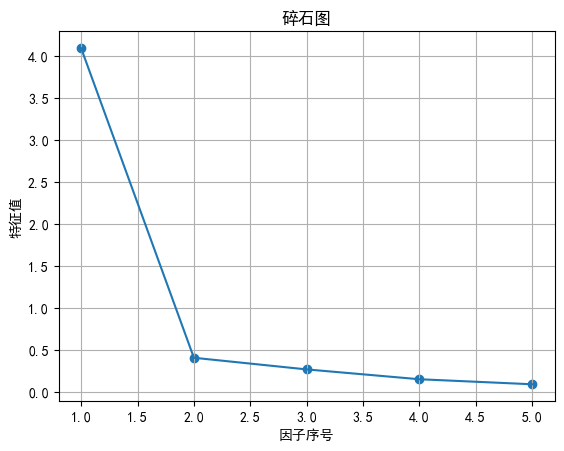


方差贡献情况：
   因子序号    特征值  方差贡献率(%)  累计贡献率(%)
0     1  4.087    81.748    81.748
1     2  0.405     8.108    89.857
2     3  0.267     5.340    95.197
3     4  0.150     3.000    98.196
4     5  0.090     1.804   100.000


In [31]:
df_clean = preprocess(df_perceived_profit_silence)
kmo_bartlett(df_clean)
factor_number(df_clean)

因子载荷矩阵：
                                                      因子1    因子2
14、假设你即将要采取保持沉默，等待第三方想办法解决问题的行动，那么你对下面的说法认可程度多高...  0.735  0.533
14、B.\t这会给我带来职业晋升机会                                 0.884  0.404
14、C.\t这会使我获得满意的经济等物质奖励                             0.834  0.410
14、D.\t这会让我觉得我在做正确的事情                               0.414  0.908
14、E.\t这会使我获得心理上的满足或者释怀                             0.551  0.570


C:\Users\zimin\AppData\Roaming\Python\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.draw()
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


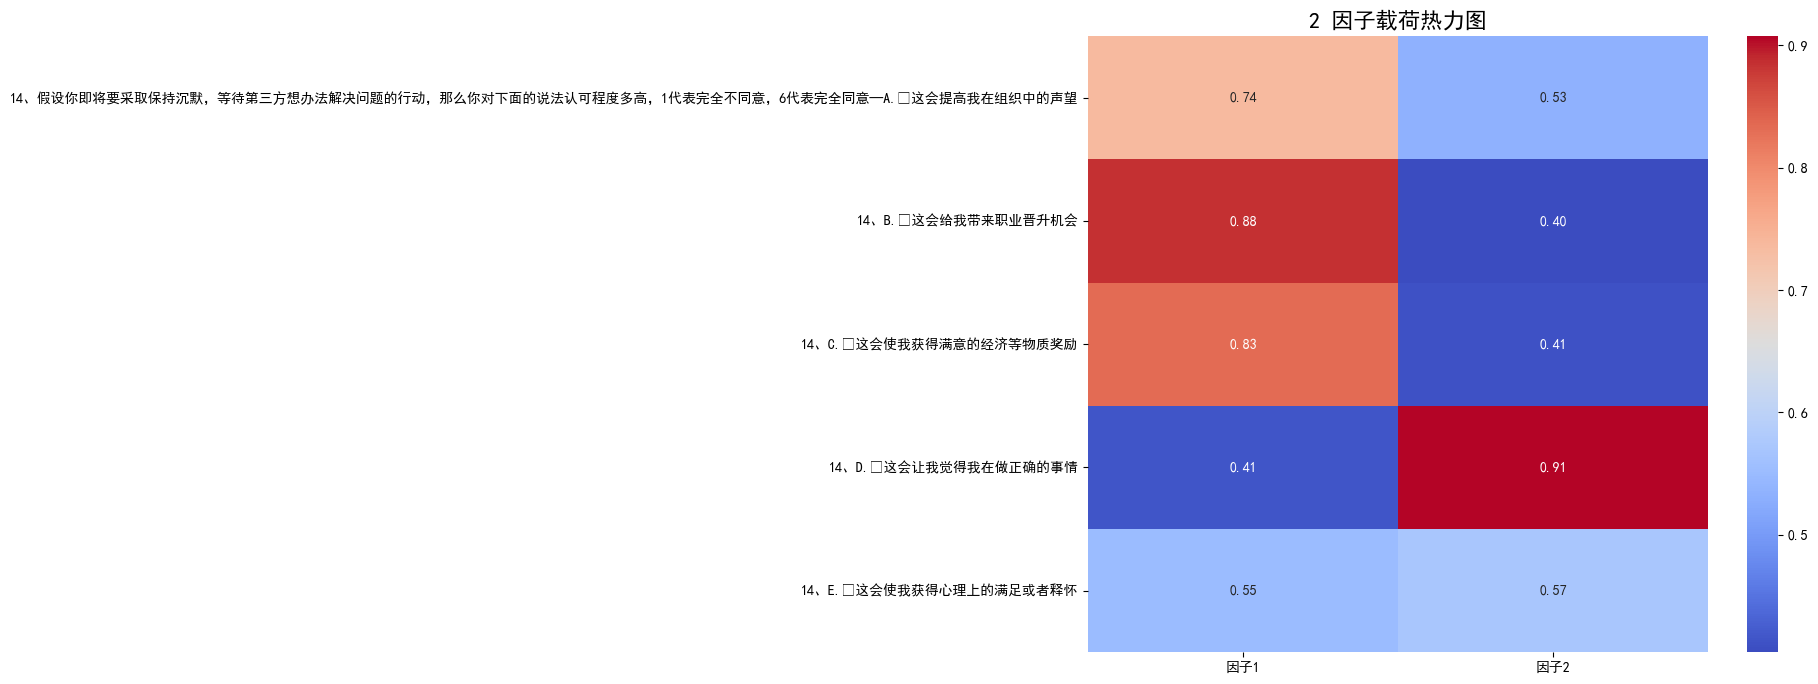

In [32]:
extract_factors(df_clean, n_factors=2, rotation='varimax')

In [33]:
df_perceived_profit_silence_material = pd.concat([P_1, P_2, P_3], axis=1)
df_perceived_profit_silence_psychology = pd.concat([P_4, P_5], axis=1)

cronbach = cronbach_alpha(df_perceived_profit_silence_material)
cronbach = cronbach_alpha(df_perceived_profit_silence_psychology)

Cronbach = 0.9513765526394005
Cronbach = 0.8515423937951703
